<a href="https://colab.research.google.com/github/PedroHenrique0214/mvp_analise_de_dados/blob/main/MVP_analise_de_dados_e_boas_praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hospitais e Leitos no Brasil

## 01. Definição do Problema

Este projeto tem como objetivo analisar a evolução da infraestrutura hospitalar no Brasil entre os anos de 2019 e 2025, com foco na quantidade de hospitais e leitos disponíveis ao longo do tempo. A análise busca identificar padrões temporais, entender o impacto da pandemia da COVID-19 na expansão da rede hospitalar e avaliar se esse crescimento foi pontual ou sustentado nos anos seguintes.

Além da visão nacional, será realizada uma análise regionalizada para identificar quais regiões e estados brasileiros registraram os maiores aumentos na infraestrutura hospitalar durante o período pandêmico, investigando também se essa tendência se manteve ou apresentou sinais de retração após a fase crítica da pandemia.

Como etapa final, será implementado um modelo preditivo de série temporal utilizando técnicas de Machine Learning, com o intuito de projetar a tendência futura da disponibilidade de leitos hospitalares.

### Hipóteses do Problema

Algumas hipóteses levantadas para o problema são o seguinte:

1. A pandemia de COVID-19 provocou um aumento significativo no número de leitos hospitalares, principalmente em UTIs.

2. Após o período crítico da pandemia, houve uma estabilização na taxa de crescimento de leitos hospitalares.

3. As regiões brasileiras responderam de forma desigual à pandemia.

4. É possível prever com relativa precisão a tendência de crescimento ou queda na quantidade de hospitais utilizando algoritmos de aprendizado de máquina.

### Tipo de Problema

Esse é um tipo de problema de série temporal. Vamos entender a tendência de uma característica ao longo de um determinado período.

### Importando as bibliotecas necessárias.

In [1]:
# Para lidar com mensagens de erro
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando as principais bibliotecas para tratamento e visualização dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Vamos treinar nosso modelo com essa biblioteca
from xgboost import XGBRegressor

# Vamos importar também as métricas de validação
from sklearn.metrics import mean_absolute_error, mean_squared_error


## 02. Carga de Dados

Realizando as cargas dos arquivos diretamente do GitHub.

Vou realizar as cargas em dois tempos, pois os arquivos de 2023 para frente estão em um formato diferente, precisando de um tratamento antes de juntar.

In [3]:
# URL para acesso dos dados
url_base = "https://github.com/PedroHenrique0214/mvp_analise_de_dados/raw/refs/heads/main/dados_leitos/Leitos_{}.xml"

# Range de Anos de Hospitais e Leitos extraídos do site do Gov de 2016 até 2022
anos = list(range(2016, 2023))

# Armazenando todos os dataframes
dataframes_1 = []

# Fazendo um loop para a carga e armazenamento dos dados de 2016 até 2022
for ano in anos:
    url = url_base.format(ano)
    try:
        df_1 = pd.read_xml(url)
        df_1["ANO"] = ano
        dataframes_1.append(df_1)
        print(f"Dados de {ano} carregados com sucesso!")
    except Exception as e:
        print(f"Erro ao carregar dados de {ano}: {e}")

Dados de 2016 carregados com sucesso!
Dados de 2017 carregados com sucesso!
Dados de 2018 carregados com sucesso!
Dados de 2019 carregados com sucesso!
Dados de 2020 carregados com sucesso!
Dados de 2021 carregados com sucesso!
Dados de 2022 carregados com sucesso!


In [4]:
# Concatenando os dataframes em um único
df_1 = pd.concat(dataframes_1, ignore_index=True)

In [5]:
# Range de Anos de Hospitais e Leitos extraídos do site do Gov de 2023 até 2025
anos = list(range(2023, 2026))

# Armazenando todos os dataframes
dataframes_2 = []

# Fazendo um loop para a carga e armazenamento dos dados de 2016 até 2022
for ano in anos:
    url = url_base.format(ano)
    try:
        df_2 = pd.read_xml(url)
        df_2["ANO"] = ano
        dataframes_2.append(df_2)
        print(f"Dados de {ano} carregados com sucesso!")
    except Exception as e:
        print(f"Erro ao carregar dados de {ano}: {e}")

Dados de 2023 carregados com sucesso!
Dados de 2024 carregados com sucesso!
Dados de 2025 carregados com sucesso!


In [6]:
# Concatenando os dataframes em um único
df_2 = pd.concat(dataframes_2, ignore_index=True)

In [7]:
# Vamos vizualizar nossos dados
df_1.head()

,index,COMP,REGIAO,UF,MUNICIPIO,MOTIVO_DESABILITACAO,CNES,NOME_ESTABELECIMENTO,RAZAO_SOCIAL,TP_GESTAO,...,UTI_ADULTO_-_SUS,UTI_PEDIATRICO_-_EXIST,UTI_PEDIATRICO_-_SUS,UTI_NEONATAL_-_EXIST,UTI_NEONATAL_-_SUS,UTI_QUEIMADO_-_EXIST,UTI_QUEIMADO_-_SUS,UTI_CORONARIANA_-_EXIST,UTI_CORONARIANA_-_SUS,ANO
0,0,201601,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,...,0,0,0,0,0,0,0,0,0,2016
1,1,201602,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,...,0,0,0,0,0,0,0,0,0,2016
2,2,201603,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,...,0,0,0,0,0,0,0,0,0,2016
3,3,201604,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,...,0,0,0,0,0,0,0,0,0,2016
4,4,201605,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,...,0,0,0,0,0,0,0,0,0,2016


In [8]:
# Vamos observar a outra parte
df_2.head()

,index,COMP,REGIAO,UF,MUNICIPIO,MOTIVO_DESABILITACAO,CNES,NOME_ESTABELECIMENTO,RAZAO_SOCIAL,TP_GESTAO,...,UTI_ADULTO_SUS,UTI_PEDIATRICO_EXIST,UTI_PEDIATRICO_SUS,UTI_NEONATAL_EXIST,UTI_NEONATAL_SUS,UTI_QUEIMADO_EXIST,UTI_QUEIMADO_SUS,UTI_CORONARIANA_EXIST,UTI_CORONARIANA_SUS,ANO
0,0.0,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,...,0,0,0,0,0,0,0,0,0,2023
1,1.0,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,35,HOSPITAL MENDO SAMPAIO,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,M,...,0,0,0,0,0,0,0,0,0,2023
2,2.0,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,94,MATERNIDADE PADRE GERALDO LEITE BASTOS,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,M,...,0,0,0,0,0,0,0,0,0,2023
3,3.0,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,183,HOSPITAL SAMARITANO,SOCIEDADE HOSPITALAR SAMARITANO LTDA,M,...,0,0,0,0,0,0,0,0,0,2023
4,4.0,202301,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,221,HOSPITAL SAO SEBASTIAO,CASA DE SAUDE E MATERNIDADE SAO SEBASTIAO LTDA,M,...,0,0,0,0,0,0,0,0,0,2023


In [9]:
# Vamos vizualizar mais informações sobre os nossos dados
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585269 entries, 0 to 585268
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    585269 non-null  int64  
 1   COMP                     585269 non-null  int64  
 2   REGIAO                   585269 non-null  object 
 3   UF                       585269 non-null  object 
 4   MUNICIPIO                585269 non-null  object 
 5   MOTIVO_DESABILITACAO     0 non-null       float64
 6   CNES                     585269 non-null  int64  
 7   NOME_ESTABELECIMENTO     585269 non-null  object 
 8   RAZAO_SOCIAL             585269 non-null  object 
 9   TP_GESTAO                585269 non-null  object 
 10  CO_TIPO_UNIDADE          585269 non-null  int64  
 11  DS_TIPO_UNIDADE          585269 non-null  object 
 12  NATUREZA_JURIDICA        585269 non-null  int64  
 13  DESC_NATUREZA_JURIDICA   585269 non-null  object 
 14  NO_L

In [10]:
# Visualizando o outro dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191162 entries, 0 to 191161
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   84471 non-null   float64
 1   COMP                    191162 non-null  int64  
 2   REGIAO                  191162 non-null  object 
 3   UF                      191162 non-null  object 
 4   MUNICIPIO               191162 non-null  object 
 5   MOTIVO_DESABILITACAO    0 non-null       float64
 6   CNES                    191162 non-null  int64  
 7   NOME_ESTABELECIMENTO    191162 non-null  object 
 8   RAZAO_SOCIAL            191162 non-null  object 
 9   TP_GESTAO               191162 non-null  object 
 10  CO_TIPO_UNIDADE         191162 non-null  int64  
 11  DS_TIPO_UNIDADE         191162 non-null  object 
 12  NATUREZA_JURIDICA       191162 non-null  int64  
 13  DESC_NATUREZA_JURIDICA  191162 non-null  object 
 14  NO_LOGRADOURO       

Temos várias informações que não iremos utilizar na nossa análise. Mais a frente farei a limpeza dessas colunas.

## 03. Limpeza e Tratamento dos Dados

In [11]:
# Alterando o nome das colunas para fazer o concat
df_1.columns = [col.replace('_-_', '_') for col in df_1.columns]
df_1.rename(columns={"LEITOS_EXISTENTE": "LEITOS_EXISTENTES"}, inplace=True)

In [12]:
# Vamos agora juntar as duas bases
df = pd.concat([df_1, df_2], ignore_index=True)
df.columns

Index(['index', 'COMP', 'REGIAO', 'UF', 'MUNICIPIO', 'MOTIVO_DESABILITACAO',
       'CNES', 'NOME_ESTABELECIMENTO', 'RAZAO_SOCIAL', 'TP_GESTAO',
       'CO_TIPO_UNIDADE', 'DS_TIPO_UNIDADE', 'NATUREZA_JURIDICA',
       'DESC_NATUREZA_JURIDICA', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP', 'NU_TELEFONE', 'NO_EMAIL',
       'LEITOS_EXISTENTES', 'LEITOS_SUS', 'UTI_TOTAL_EXIST', 'UTI_TOTAL_SUS',
       'UTI_ADULTO_EXIST', 'UTI_ADULTO_SUS', 'UTI_PEDIATRICO_EXIST',
       'UTI_PEDIATRICO_SUS', 'UTI_NEONATAL_EXIST', 'UTI_NEONATAL_SUS',
       'UTI_QUEIMADO_EXIST', 'UTI_QUEIMADO_SUS', 'UTI_CORONARIANA_EXIST',
       'UTI_CORONARIANA_SUS', 'ANO'],
      dtype='object')

In [13]:
# Reduzindo o número de colunas do nosso dataset
df = df.drop(["MUNICIPIO", "MOTIVO_DESABILITACAO", "CO_TIPO_UNIDADE", "NATUREZA_JURIDICA", "NO_LOGRADOURO", "NU_ENDERECO", "NO_COMPLEMENTO", "NO_BAIRRO", "CO_CEP", "NU_TELEFONE", "NO_EMAIL", "index"], axis=1)
df.columns

Index(['COMP', 'REGIAO', 'UF', 'CNES', 'NOME_ESTABELECIMENTO', 'RAZAO_SOCIAL',
       'TP_GESTAO', 'DS_TIPO_UNIDADE', 'DESC_NATUREZA_JURIDICA',
       'LEITOS_EXISTENTES', 'LEITOS_SUS', 'UTI_TOTAL_EXIST', 'UTI_TOTAL_SUS',
       'UTI_ADULTO_EXIST', 'UTI_ADULTO_SUS', 'UTI_PEDIATRICO_EXIST',
       'UTI_PEDIATRICO_SUS', 'UTI_NEONATAL_EXIST', 'UTI_NEONATAL_SUS',
       'UTI_QUEIMADO_EXIST', 'UTI_QUEIMADO_SUS', 'UTI_CORONARIANA_EXIST',
       'UTI_CORONARIANA_SUS', 'ANO'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776431 entries, 0 to 776430
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   COMP                    776431 non-null  int64 
 1   REGIAO                  776431 non-null  object
 2   UF                      776431 non-null  object
 3   CNES                    776431 non-null  int64 
 4   NOME_ESTABELECIMENTO    776431 non-null  object
 5   RAZAO_SOCIAL            776431 non-null  object
 6   TP_GESTAO               776431 non-null  object
 7   DS_TIPO_UNIDADE         776431 non-null  object
 8   DESC_NATUREZA_JURIDICA  776431 non-null  object
 9   LEITOS_EXISTENTES       776431 non-null  int64 
 10  LEITOS_SUS              776431 non-null  int64 
 11  UTI_TOTAL_EXIST         776431 non-null  int64 
 12  UTI_TOTAL_SUS           776431 non-null  int64 
 13  UTI_ADULTO_EXIST        776431 non-null  int64 
 14  UTI_ADULTO_SUS          776431 non-n

Temos então um grande dataset, com mais de 500 mil linhas, com dados hospitalares de 2019 até 2025.

Não temos nenhum valor nulo, exceletente! Podemos prosseguir nosso tratamento.

In [15]:
# Pegando o valor dos meses do dataset
df["MES"] = df["COMP"].astype(str).str[4:]

# Removendo a coluna "COMP"
df = df.drop(["COMP"], axis=1)

# Criando nossa coluna do tipo datetime
df["DATA"] = pd.to_datetime(df["ANO"].astype(str) + "-" + df["MES"].astype(str), format="%Y-%m")

# Eliminando nossas colunas de mês e ano
df.drop(["ANO", "MES"], axis=1, inplace=True)

In [16]:
# Observando a descrição da natureza juridica
df["DESC_NATUREZA_JURIDICA"].value_counts()

,count
DESC_NATUREZA_JURIDICA,
HOSPITAL_PUBLICO,263568
HOSPITAL_PRIVADO,222741
HOSPITAL_FILANTROPICO,154017
HOSPITAL_P�BLICO,48727
HOSPITAL_PÚBLICO,38628
HOSPITAL_FILANTR�PICO,27253
HOSPITAL_FILANTRÓPICO,21497


Temos alguns caracteres estranhos, vamos fazer a limpeza e juntar essas características em uma só.

In [17]:
# Ajustando os caracteres '�'
df.loc[df["DESC_NATUREZA_JURIDICA"] == "HOSPITAL_FILANTR�PICO", "DESC_NATUREZA_JURIDICA"] = "HOSPITAL_FILANTROPICO"
df.loc[df["DESC_NATUREZA_JURIDICA"] == "HOSPITAL_P�BLICO", "DESC_NATUREZA_JURIDICA"] = "HOSPITAL_PUBLICO"
df.loc[df["DESC_NATUREZA_JURIDICA"] == "HOSPITAL_PÚBLICO", "DESC_NATUREZA_JURIDICA"] = "HOSPITAL_PUBLICO"
df.loc[df["DESC_NATUREZA_JURIDICA"] == "HOSPITAL_FILANTRÓPICO", "DESC_NATUREZA_JURIDICA"] = "HOSPITAL_FILANTROPICO"

In [18]:
# Ajustando o tipo de gestão seguindo a documentação do data sus
df.loc[df["TP_GESTAO"] == "M", "TP_GESTAO"] = "MUNICIPAL"
df.loc[df["TP_GESTAO"] == "E", "TP_GESTAO"] = "ESTADUAL"
df.loc[df["TP_GESTAO"] == "D", "TP_GESTAO"] = "DUPLA"

In [19]:
# Vamos observar nosso dataset
df.head()

,REGIAO,UF,CNES,NOME_ESTABELECIMENTO,RAZAO_SOCIAL,TP_GESTAO,DS_TIPO_UNIDADE,DESC_NATUREZA_JURIDICA,LEITOS_EXISTENTES,LEITOS_SUS,...,UTI_ADULTO_SUS,UTI_PEDIATRICO_EXIST,UTI_PEDIATRICO_SUS,UTI_NEONATAL_EXIST,UTI_NEONATAL_SUS,UTI_QUEIMADO_EXIST,UTI_QUEIMADO_SUS,UTI_CORONARIANA_EXIST,UTI_CORONARIANA_SUS,DATA
0,NORDESTE,PE,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,MUNICIPAL,HOSPITAL GERAL,HOSPITAL_PRIVADO,64,56,...,0,0,0,0,0,0,0,0,0,2016-01-01
1,NORDESTE,PE,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,MUNICIPAL,HOSPITAL GERAL,HOSPITAL_PRIVADO,64,56,...,0,0,0,0,0,0,0,0,0,2016-02-01
2,NORDESTE,PE,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,MUNICIPAL,HOSPITAL GERAL,HOSPITAL_PRIVADO,64,56,...,0,0,0,0,0,0,0,0,0,2016-03-01
3,NORDESTE,PE,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,MUNICIPAL,HOSPITAL GERAL,HOSPITAL_PRIVADO,64,56,...,0,0,0,0,0,0,0,0,0,2016-04-01
4,NORDESTE,PE,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,MUNICIPAL,HOSPITAL GERAL,HOSPITAL_PRIVADO,64,56,...,0,0,0,0,0,0,0,0,0,2016-05-01


Excelente, com os dados tratados, podemos seguir com nossa análise exploratória.

## 04. Análise Exploratória de Dados

In [20]:
# Vamos observar os valores numéricos do dataset com mais detalhes
df.describe()

,CNES,LEITOS_EXISTENTES,LEITOS_SUS,UTI_TOTAL_EXIST,UTI_TOTAL_SUS,UTI_ADULTO_EXIST,UTI_ADULTO_SUS,UTI_PEDIATRICO_EXIST,UTI_PEDIATRICO_SUS,UTI_NEONATAL_EXIST,UTI_NEONATAL_SUS,UTI_QUEIMADO_EXIST,UTI_QUEIMADO_SUS,UTI_CORONARIANA_EXIST,UTI_CORONARIANA_SUS,DATA
count,7.764310e+05,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431.000000,776431
mean,3.227666e+06,71.533619,48.622925,7.220799,3.578199,4.932167,2.417666,0.752242,0.396867,1.340422,0.692727,0.033825,0.023211,0.162143,0.047727,2020-08-12 00:04:21.615520512
min,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-01-01 00:00:00
25%,2.270609e+06,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-04-01 00:00:00
50%,2.530805e+06,41.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-09-01 00:00:00
75%,3.074889e+06,86.000000,55.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-12-01 00:00:00
max,9.997784e+06,1843.000000,1730.000000,402.000000,365.000000,297.000000,245.000000,80.000000,56.000000,130.000000,104.000000,14.000000,14.000000,66.000000,30.000000,2025-03-01 00:00:00
std,2.010312e+06,94.145157,81.258915,16.953058,11.843943,12.068764,8.220385,3.165147,2.182299,4.859992,3.358808,0.480232,0.345658,1.599780,0.708371,NaN


Algumas informações já podem ser obtidas:

  * A quantidade de Leitos gerais é considerávelmente maior do que os leitos expecializados.
  * Os leitos pediátricas representam um valor muito pequeno em relação ao total.
  * A quantidade de leitos destinados ao SUS é também considerávelmente menor que os leitos gerais.



### Observando a Quantidade de Hospitais ao longo dos anos

<Figure size 1000x600 with 0 Axes>

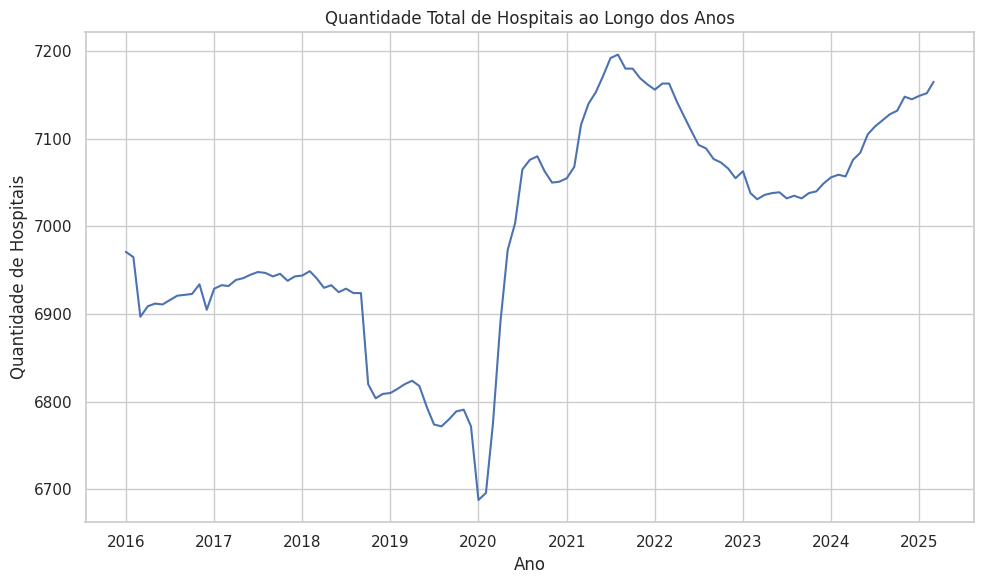

In [21]:
# Plotando quantidade de hospitais durante o período
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

# Agrupando os valores pela data
df_hospitais = (
    df.groupby(["DATA"])["CNES"]
    .nunique()
    .reset_index(name="qtd_hospitais")
)

# Plotar a série temporal
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_hospitais,
    x="DATA",
    y="qtd_hospitais"
)

# Ajustando os textos do gráfico
plt.title("Quantidade Total de Hospitais ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Hospitais")
plt.tight_layout()
plt.show()

Observa-se que houve, de fato, um aumento considerável no número de hospitais a partir de 2020, início da pandemia da COVID-19. Esse crescimento se manteve até atingir seu pico em meados de 2021, quando passou a apresentar uma tendência de queda. Essa redução persistiu até aproximadamente 2024, momento em que a quantidade de hospitais voltou a crescer, mantendo até o momento uma trajetória de recuperação.

### Vamos quebrar esse valor pelo Tipo da Unidade



<Figure size 1000x600 with 0 Axes>

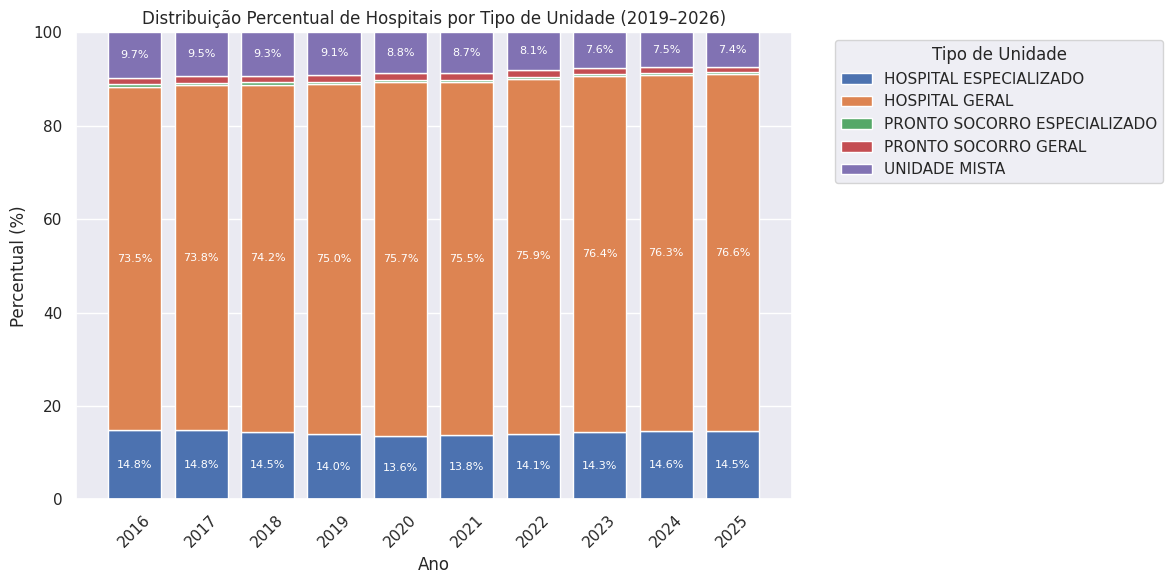

In [22]:
# Plotando quantidade de hospitais durante o período
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

# Agrupando os valores pela data e tipo de unidade
df_hospitais = (
    df.groupby(["DATA", "DS_TIPO_UNIDADE"])["CNES"]
    .nunique()
    .reset_index(name="qtd_hospitais")
)

# Garantir que 'ano' esteja extraído
df_hospitais["ano"] = pd.to_datetime(df_hospitais["DATA"]).dt.year

# Pivotar para colocar os tipos de unidade como colunas
df_pivot = df_hospitais.pivot_table(index="ano", columns="DS_TIPO_UNIDADE", values="qtd_hospitais", aggfunc="sum").fillna(0)

# Calcular percentuais
df_percent = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Plotar gráfico
plt.figure(figsize=(12, 6))

bottom = None
for tipo in df_percent.columns:
    plt.bar(
        df_percent.index,
        df_percent[tipo],
        label=tipo,
        bottom=bottom
    )
    bottom = df_percent[tipo] if bottom is None else bottom + df_percent[tipo]

# Adiciona os valores percentuais sobre as barras
for i, ano in enumerate(df_percent.index):
    altura_acumulada = 0
    for tipo in df_percent.columns:
        valor = df_percent.loc[ano, tipo]
        if valor > 5:
            plt.text(
                x=ano,
                y=altura_acumulada + valor / 2,
                s=f'{valor:.1f}%',
                ha='center',
                va='center',
                fontsize=8,
                color='white'
            )
        altura_acumulada += valor

# Ajustando os textos do gráfico
plt.title("Distribuição Percentual de Hospitais por Tipo de Unidade (2019–2026)")
plt.xlabel("Ano")
plt.ylabel("Percentual (%)")
plt.ylim(0, 100)
plt.legend(title="Tipo de Unidade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_percent.index, rotation=45)
plt.tight_layout()
plt.show()

A principal mudança observada ao longo dos anos é a diminuição da participação percentual das Unidades Mistas e o aumento da representatividade dos Hospitais Gerais. Essa alteração, no entanto, não se deve apenas à redução das Unidades Mistas, mas também ao crescimento no número de Hospitais Gerais e de outros tipos de unidades hospitalares.

Vamos observar isso:

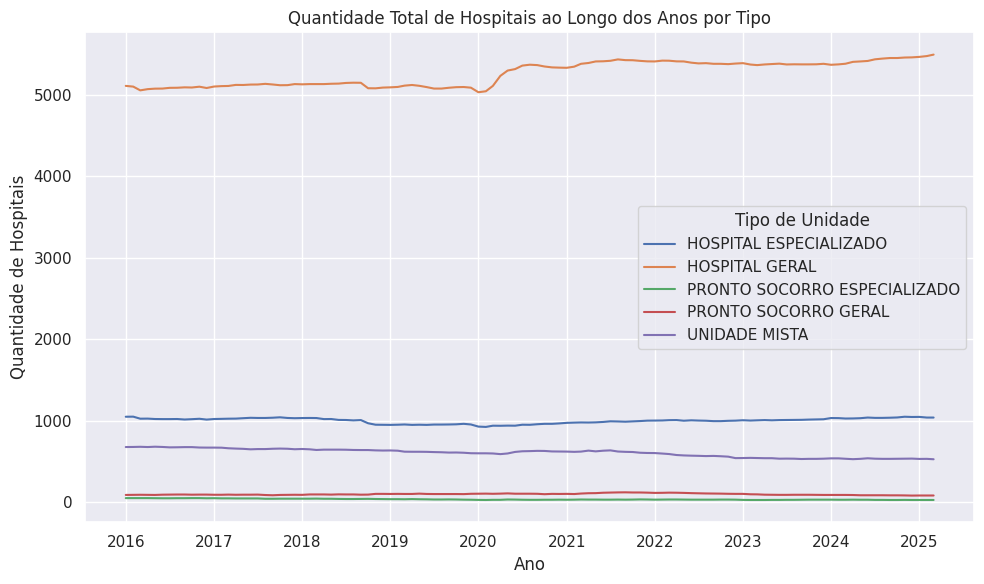

In [23]:
# Agrupando os valores pela data e tipo
df_hospitais = (
    df.groupby(["DATA", "DS_TIPO_UNIDADE"])["CNES"]
    .nunique()
    .reset_index(name="qtd_hospitais")
)

# Arrumando o tamanho
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_hospitais,
    x="DATA",
    y="qtd_hospitais",
    hue="DS_TIPO_UNIDADE"
)

# Ajustando os textos do gráfico
plt.title("Quantidade Total de Hospitais ao Longo dos Anos por Tipo")
plt.legend(title="Tipo de Unidade", loc='center right')
plt.xlabel("Ano")
plt.ylabel("Quantidade de Hospitais")
plt.tight_layout()
plt.show()


Observando com mais atenção, percebe-se que o aumento mais acentuado no início da pandemia ocorreu especificamente na quantidade de Hospitais Gerais. Esse crescimento não foi tão expressivo entre os demais tipos de unidade, indicando que a expansão da infraestrutura hospitalar naquele período foi concentrada principalmente nesse tipo específico de estabelecimento.

### Vamos observar agora a quantidade de leitos

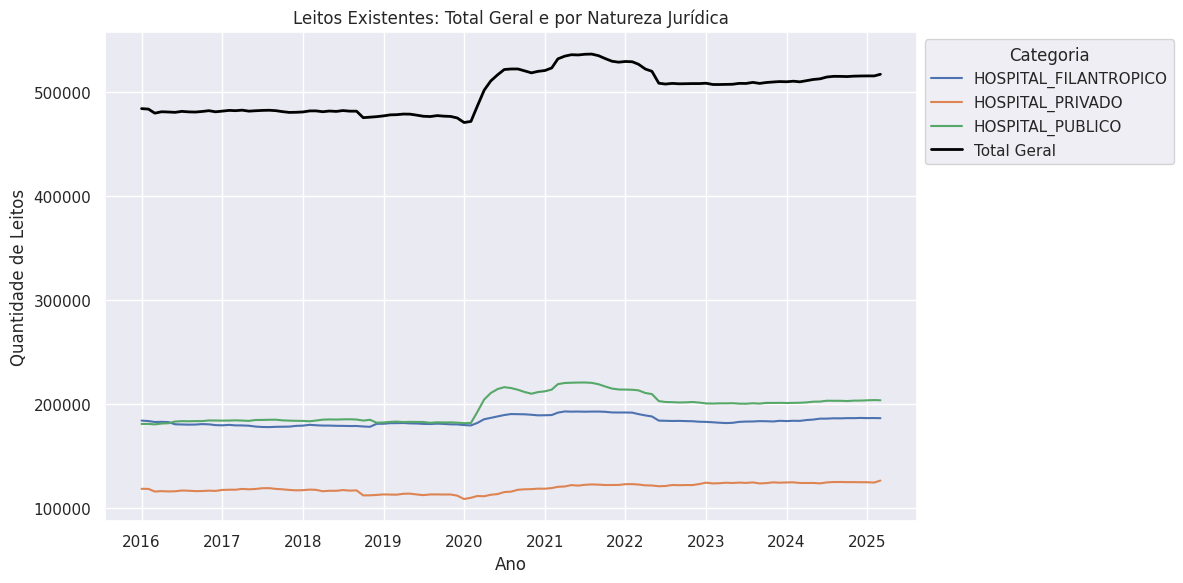

In [24]:
# Configurando o gráfico
plt.figure(figsize=(12, 6))

# Agrupar leitos existentes pela data
df_leitos_ano = df.groupby("DATA")["LEITOS_EXISTENTES"].sum().reset_index()

# Vamos agrupar também pelo tipo da natureza jurídica
df_leitos_grupo = df.groupby(["DATA", "DESC_NATUREZA_JURIDICA"])["LEITOS_EXISTENTES"].sum().reset_index()

# Linhas por natureza jurídica
sns.lineplot(data=df_leitos_grupo, x="DATA", y="LEITOS_EXISTENTES", hue="DESC_NATUREZA_JURIDICA", legend="full")

# Linha do total geral
sns.lineplot(data=df_leitos_ano, x="DATA", y="LEITOS_EXISTENTES", color="black", label="Total Geral", linewidth=2, )

# Colocando título e legendas
plt.title("Leitos Existentes: Total Geral e por Natureza Jurídica")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Leitos")
plt.legend(title="Categoria", bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.show()

A maior parte dos leitos hospitalares no país está concentrada em instituições públicas e filantrópicas, o que evidencia a importância de políticas públicas de saúde bem estruturadas. O sistema de saúde brasileiro depende fortemente da rede pública, já que a infraestrutura privada, por si só, não seria capaz de atender adequadamente toda a população.

Podemos notar também que, após o auge da pandemia, houve uma queda na quantidade de leitos disponíveis no país. Embora essa capacidade esteja sendo gradualmente recuperada, o ritmo de crescimento é mais demorado. Esse cenário reforça a importância do planejamento contínuo e da manutenção dos investimentos em infraestrutura hospitalar, mesmo em períodos de relativa estabilidade para suportar situações de emergência.

### Vamos observar a quantidade de leitos por região

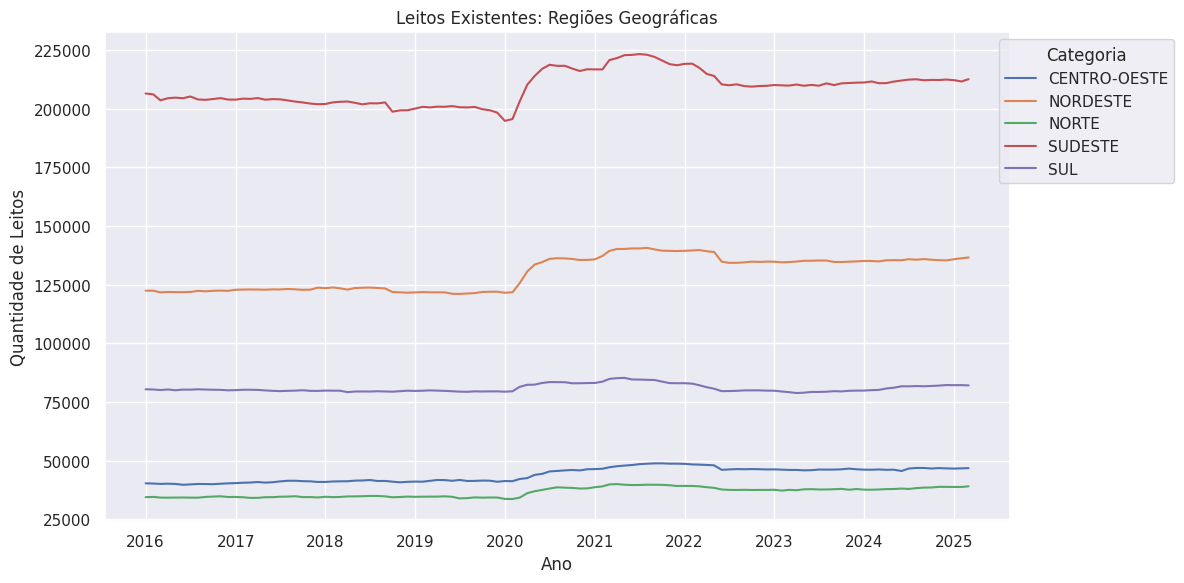

In [25]:
# Configurando o gráfico
plt.figure(figsize=(12, 6))

# Agrupar leitos existentes pela data
df_leitos_ano = df.groupby(["DATA", "REGIAO"])["LEITOS_EXISTENTES"].sum().reset_index()

# Vamos plotar as linhas por região
sns.lineplot(data=df_leitos_ano, x="DATA", y="LEITOS_EXISTENTES", hue="REGIAO")

# Colocando título e legendas
plt.title("Leitos Existentes: Regiões Geográficas")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Leitos")
plt.legend(title="Categoria", bbox_to_anchor=(0.98, 1), loc='upper left')
plt.tight_layout()
plt.show()


Como era esperado, essa quantidade de Leitos está focada onde existe também uma maior concetração populacional no país.

A seguir, analisaremos as Unidades da Federação (UF) quanto à quantidade de leitos hospitalares disponíveis antes e após a pandemia.

<Figure size 1500x800 with 0 Axes>

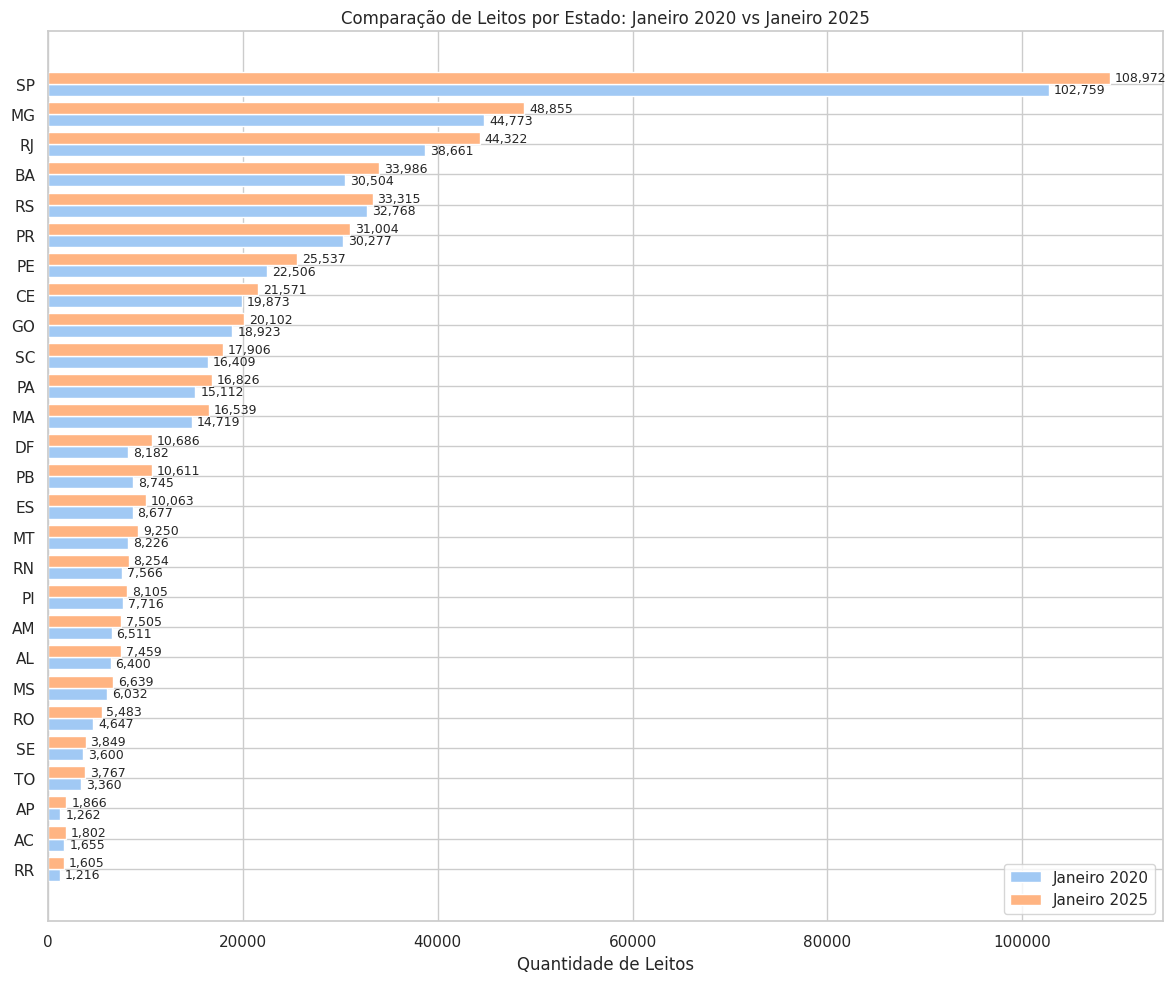

In [26]:
# Configurando o gráfico
plt.figure(figsize=(15, 8))

# Filtrar para janeiro de 2020 e janeiro de 2025
df_jan_2020 = df[(df["DATA"].dt.year == 2020) & (df["DATA"].dt.month == 1)]
df_jan_2025 = df[(df["DATA"].dt.year == 2025) & (df["DATA"].dt.month == 1)]

# Agrupar por estado (UF)
df_2020 = df_jan_2020.groupby("UF")["LEITOS_EXISTENTES"].sum().reset_index()
df_2025 = df_jan_2025.groupby("UF")["LEITOS_EXISTENTES"].sum().reset_index()

# Renomear colunas
df_2020 = df_2020.rename(columns={"LEITOS_EXISTENTES": "Janeiro 2020"})
df_2025 = df_2025.rename(columns={"LEITOS_EXISTENTES": "Janeiro 2025"})

# Juntar os dois DataFrames
df_comparacao = pd.merge(df_2020, df_2025, on="UF")

# Ordenar por valores mais recentes
df_comparacao = df_comparacao.sort_values("Janeiro 2025", ascending=True).reset_index(drop=True)

# Plotar gráfico de barras horizontais
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

bar_width = 0.4
y = range(len(df_comparacao))

# Barras: Janeiro 2020
plt.barh(
    [i - bar_width / 2 for i in y],
    df_comparacao["Janeiro 2020"],
    height=bar_width,
    label="Janeiro 2020",
    color="#a1c9f4"
)

# Barras: Janeiro 2025
plt.barh(
    [i + bar_width / 2 for i in y],
    df_comparacao["Janeiro 2025"],
    height=bar_width,
    label="Janeiro 2025",
    color="#ffb482"
)

# Rótulos nas barras
for i, uf in enumerate(df_comparacao["UF"]):
    antes = df_comparacao.loc[i, "Janeiro 2020"]
    depois = df_comparacao.loc[i, "Janeiro 2025"]

    plt.text(antes + 500, i - bar_width / 2, f"{int(antes):,}", va="center", fontsize=9)
    plt.text(depois + 500, i + bar_width / 2, f"{int(depois):,}", va="center", fontsize=9)

# Eixos e título
plt.yticks(y, df_comparacao["UF"])
plt.xlabel("Quantidade de Leitos")
plt.title("Comparação de Leitos por Estado: Janeiro 2020 vs Janeiro 2025")
plt.legend()
plt.tight_layout()
plt.show()



Alguns mais, outros menos, mas todos os estados tiveram um aumento na quantidade de Leitos após a pandemia. É importante que esse número se mantenha o máximo possível, para que tenhamos um sistema de saúde de qualidade no nosso país.

## 05. Modelagem

### Quantidade de Hospitais ao Longo do Tempo

Vamos analisar a evolução temporal do número de hospitais cadastrados no país e aplicar um modelo de aprendizado de máquina para prever essa quantidade nos meses seguintes.

Nosso objetivo é construir uma previsão de curto prazo utilizando os dados históricos mensais disponíveis. Para isso, agruparemos os dados por mês e extrairemos as contagens únicas de estabelecimentos de saúde (CNES).

In [27]:
# Vamos agrupar a quantidade de Hospitais pelo mês/ano
df_hospitais = (
    df.groupby(["DATA"])["CNES"]
    .nunique()
    .reset_index(name="qtd_hospitais")
)

df_hospitais.tail()

,DATA,qtd_hospitais
106,2024-11-01,7148
107,2024-12-01,7145
108,2025-01-01,7149
109,2025-02-01,7152
110,2025-03-01,7165


### Estrutura dos Dados para Modelagem

Para treinar o modelo, consideraremos como entrada as quantidades de hospitais registradas nos **últimos 6 meses**, de forma a prever o valor do mês atual.

Essa abordagem de defasagem (lag features) é comum em problemas de séries temporais com modelos supervisionados como XGBoost.

> Em cenários reais com séries temporais mais longas, seria possível aplicar janelas maiores ou até técnicas como rolling statistics (médias móveis, tendência etc).

In [28]:
# Criando colunas para os últimos 6 meses
df_hospitais["qtd_hospitais_lag1"] = df_hospitais["qtd_hospitais"].shift(1)
df_hospitais["qtd_hospitais_lag2"] = df_hospitais["qtd_hospitais"].shift(2)
df_hospitais["qtd_hospitais_lag3"] = df_hospitais["qtd_hospitais"].shift(3)
df_hospitais["qtd_hospitais_lag4"] = df_hospitais["qtd_hospitais"].shift(4)
df_hospitais["qtd_hospitais_lag5"] = df_hospitais["qtd_hospitais"].shift(5)
df_hospitais["qtd_hospitais_lag6"] = df_hospitais["qtd_hospitais"].shift(6)

In [29]:
# Apagando as linhas vazias geradas
df_hospitais = df_hospitais.dropna()

Criando uma coluna de *diferença* para mostrar se houve crecimento ou não em relação ao mês anterior.

In [30]:
# Criando a nova coluna
df_hospitais["diferenca_1_mes"] = df_hospitais["qtd_hospitais"] - df_hospitais["qtd_hospitais_lag1"]

Criando uma pequena média móvel dos últimos 3 meses para também utilizar no nosso algoritmo

In [31]:
# Criando a média móvel
df_hospitais["media_3_meses"] = df_hospitais["qtd_hospitais"].rolling(window=3).mean()

In [32]:
# Apagando as linhas vazias geradas novamente
df_hospitais = df_hospitais.dropna()

In [33]:
df_hospitais.head()

,DATA,qtd_hospitais,qtd_hospitais_lag1,qtd_hospitais_lag2,qtd_hospitais_lag3,qtd_hospitais_lag4,qtd_hospitais_lag5,qtd_hospitais_lag6,diferenca_1_mes,media_3_meses
8,2016-09-01,6922,6921.0,6916.0,6911.0,6912.0,6909.0,6897.0,1.0,6919.666667
9,2016-10-01,6923,6922.0,6921.0,6916.0,6911.0,6912.0,6909.0,1.0,6922.000000
10,2016-11-01,6934,6923.0,6922.0,6921.0,6916.0,6911.0,6912.0,11.0,6926.333333
11,2016-12-01,6905,6934.0,6923.0,6922.0,6921.0,6916.0,6911.0,-29.0,6920.666667
12,2017-01-01,6929,6905.0,6934.0,6923.0,6922.0,6921.0,6916.0,24.0,6922.666667


### Vamos criar o nosso modelo!

Optamos por utilizar o modelo XGBRegressor, uma implementação eficiente de Gradient Boosting baseada em árvores. Este modelo é amplamente reconhecido por seu excelente desempenho em problemas supervisionados, incluindo séries temporais, especialmente quando utilizamos features derivadas como lags e médias móveis.

Diferente de modelos lineares que são sensíveis à escala dos dados, o XGBRegressor não exige normalização ou padronização das variáveis preditoras, pois algoritmos baseados em árvores tomam decisões com base em divisões de valores e não na distância entre eles. Essa característica torna o pré-processamento mais simples e o modelo mais robusto a diferentes escalas.

In [34]:
# Separando as features do nosso target
X = df_hospitais.drop(columns=["DATA", "qtd_hospitais"])
y = df_hospitais["qtd_hospitais"]

# Separando o último período como teste
X_train, X_test = X.iloc[:-1], X.iloc[-1:]
y_train, y_test = y.iloc[:-1], y.iloc[-1:]

# Chamando o modelo
modelo = XGBRegressor(n_estimators=100)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [35]:
# Nossos resultados
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Exibindo
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAE: 17.85
MSE: 318.70


Vamos plotar nossos resultados em um gráfico.

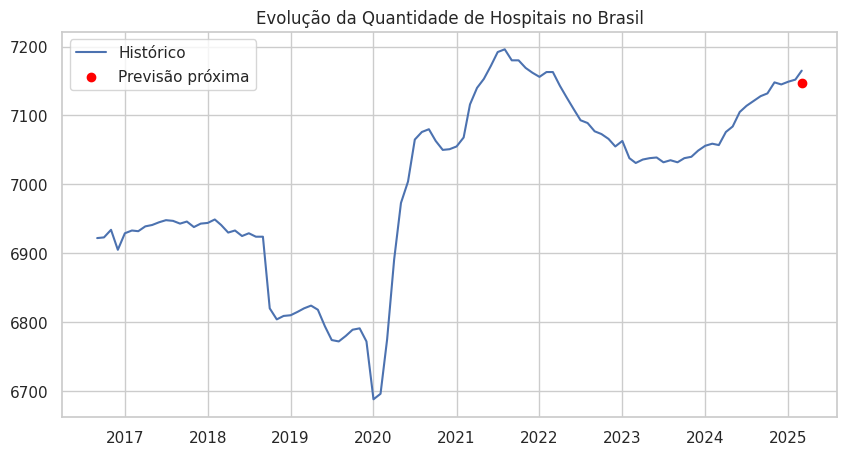

In [36]:
# Vamos visualizar o nosso resultado
plt.figure(figsize=(10,5))
plt.plot(df_hospitais["DATA"], df_hospitais["qtd_hospitais"], label="Histórico")
plt.scatter(df_hospitais["DATA"].iloc[-1], y_pred, color='red', label="Previsão próxima")
plt.legend()
plt.title("Evolução da Quantidade de Hospitais no Brasil")
plt.show()

O modelo apresentou uma leve subestimação no número de hospitais previstos. No entanto, isso já era esperado, considerando que trabalhamos com um dataset relativamente limitado e utilizamos apenas variáveis temporais simples (como lags e médias móveis), sem incorporar outras dimensões explicativas, como tipo de estabelecimento, região, natureza jurídica ou sazonalidade mais refinada.

Ainda assim, o experimento demonstra que é possível aplicar técnicas de aprendizado de máquina para prever tendências em dados de saúde pública, como a quantidade de hospitais ativos ao longo do tempo.

### Vamos fazer o mesmo com os Leitos!

In [37]:
# Vamos agrupar a quantidade de Hospitais pelo mês/ano
df_leitos = (
    df.groupby(["DATA"])["LEITOS_EXISTENTES"]
    .sum()
    .reset_index(name="qtd_leitos")
)

# Criando nossas lags
df_leitos["qtd_leitos_lag1"] = df_leitos["qtd_leitos"].shift(1)
df_leitos["qtd_leitos_lag2"] = df_leitos["qtd_leitos"].shift(2)
df_leitos["qtd_leitos_lag3"] = df_leitos["qtd_leitos"].shift(3)
df_leitos["qtd_leitos_lag4"] = df_leitos["qtd_leitos"].shift(4)
df_leitos["qtd_leitos_lag5"] = df_leitos["qtd_leitos"].shift(5)
df_leitos["qtd_leitos_lag6"] = df_leitos["qtd_leitos"].shift(6)

# Criando a nova coluna (diferença)
df_leitos["diferenca_1_mes"] = df_leitos["qtd_leitos"] - df_leitos["qtd_leitos_lag1"]

# Criando a média móvel
df_leitos["media_3_meses"] = df_leitos["qtd_leitos"].rolling(window=3).mean()

# Eliminando colunas vazias
df_leitos = df_leitos.dropna()

# Vamos vizualizar
df_leitos.head()

,DATA,qtd_leitos,qtd_leitos_lag1,qtd_leitos_lag2,qtd_leitos_lag3,qtd_leitos_lag4,qtd_leitos_lag5,qtd_leitos_lag6,diferenca_1_mes,media_3_meses
6,2016-07-01,481781,480844.0,481178.0,481418.0,480060.0,483971.0,484424.0,937.0,481267.666667
7,2016-08-01,481297,481781.0,480844.0,481178.0,481418.0,480060.0,483971.0,-484.0,481307.333333
8,2016-09-01,481127,481297.0,481781.0,480844.0,481178.0,481418.0,480060.0,-170.0,481401.666667
9,2016-10-01,481686,481127.0,481297.0,481781.0,480844.0,481178.0,481418.0,559.0,481370.000000
10,2016-11-01,482438,481686.0,481127.0,481297.0,481781.0,480844.0,481178.0,752.0,481750.333333


### Criando o modelo

In [38]:
# Separando as features do nosso target
X = df_leitos.drop(columns=["DATA", "qtd_leitos"])
y = df_leitos["qtd_leitos"]

# Separando o último período como teste
X_train, X_test = X.iloc[:-1], X.iloc[-1:]
y_train, y_test = y.iloc[:-1], y.iloc[-1:]

# Chamando o modelo
modelo = XGBRegressor(n_estimators=100)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Observando o resultado
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Exibindo
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAE: 1607.34
MSE: 2583554.00


Plotando o gráfico.

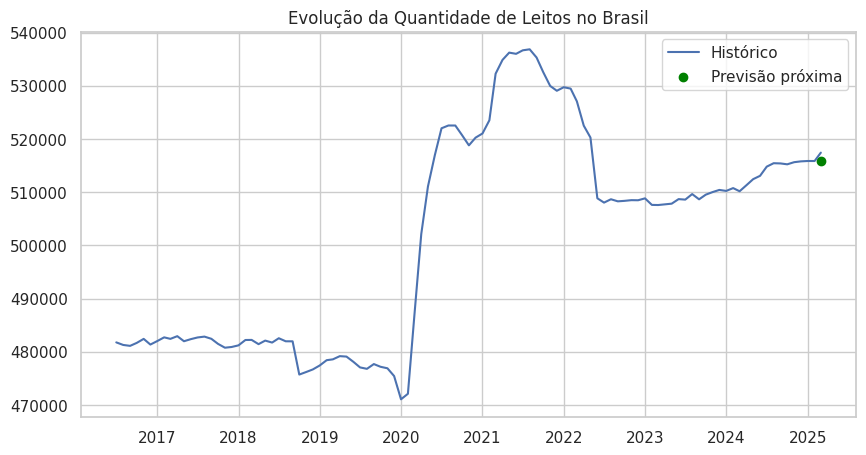

In [39]:
# Vamos visualizar o nosso resultado
plt.figure(figsize=(10,5))
plt.plot(df_leitos["DATA"], df_leitos["qtd_leitos"], label="Histórico")
plt.scatter(df_leitos["DATA"].iloc[-1], y_pred, color='green', label="Previsão próxima")
plt.legend()
plt.title("Evolução da Quantidade de Leitos no Brasil")
plt.show()

Dessa vez, a predição foi consideravelmente mais precisa, demonstrando a capacidade do modelo em capturar a tendência dos dados com maior fidelidade. Esse resultado evidencia o potencial dos algoritmos de machine learning, mesmo com um conjunto de dados limitado e variáveis relativamente simples.

É importante destacar que o modelo pode ser significativamente aprimorado com a incorporação de novos tratamentos, além de um histórico de dados mais extenso. Esses aprimoramentos podem aumentar a capacidade preditiva do modelo e permitir aplicações práticas ainda mais confiáveis em planejamento e tomada de decisão.

# Conclusão

A análise dos dados revelou um aumento expressivo no número de leitos hospitalares durante o período crítico da pandemia de COVID-19, com destaque para a ampliação de leitos de UTI. Essa expansão foi majoritariamente impulsionada pelos hospitais públicos, que assumiram o protagonismo no enfrentamento da crise sanitária.

No entanto, após o pico da pandemia, observou-se uma leve retração na infraestrutura hospitalar em algumas regiões, indicando uma desmobilização parcial de recursos emergenciais. Além disso, os dados evidenciaram desigualdades regionais significativas, sugerindo que o investimento em saúde pública não ocorreu de maneira uniforme em todo o território nacional.

A aplicação do modelo XGBoost para previsão temporal da quantidade de hospitais apresentou resultados consistentes, mesmo com um volume de dados limitado e poucas variáveis preditoras. Isso demonstra o potencial do uso de algoritmos de machine learning como ferramenta de apoio à tomada de decisão no planejamento e na gestão da saúde pública.

Este projeto reforça a importância da análise de dados para compreender o impacto de eventos críticos na infraestrutura de saúde, além de evidenciar o valor da modelagem preditiva na construção de políticas públicas mais eficientes e direcionadas.

